<a href="https://colab.research.google.com/github/Maria-Miroshnikova/pm-pu/blob/main/algorithms/Levit_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import queue
import math
from time import perf_counter
import matplotlib.pyplot as plt
import networkx as nx
import random

In [84]:
# Генераторы

# плохой генератор рандомного графа
def generate_graph(n, m):
  # n - nodes, m - edges
  # МОЖНО СДЕЛАТЬ НЕ/НАПРАВЛЕННЫМ!
  graph = nx.gnm_random_graph(n, m)
  # МОЖНО ПОМЕНЯТЬ ДИАПОЗОН ДЛИН!
  for (u, v) in graph.edges():
    graph[u][v]['weight'] = random.randint(1,10)

  return graph;

# генератор неориентированного разреженного связного графа со степенью каждой вершины не более 5
# start Node is 0
def generate_spare_graph(n):
  #G = nx.empty_graph(n, create_using=nx.DiGraph);
  # неориентированный, чтобы не мучиться со степенью вершины
  # иначе надо контролировать не только степень выхода, но и входа
  G = nx.empty_graph(n, create_using=nx.Graph);
  
  # путь от 0 до n
  for i in range(0, n - 1):
    G.add_edge(i, i + 1);

  # генерация дополнительных ребер каждой вершине, степень от 1 до 5
  for i in range(0, n):
    # степень для вершины
    max_d = 5;
    min_d = 1;
    degree = random.randint(2, 5);
    
    # добиваемся степени
    set_nodes = set(range(0, n));
    set_nodes.remove(i);
    while(len(G[i]) < degree):
        connection: int = random.sample(set_nodes, 1)[0];
        if (connection not in G[i] and len(G[connection]) < max_d):
          G.add_edge(i, connection);
        set_nodes.remove(connection);
    
    # назначение весов
    # МОЖНО ПОМЕНЯТЬ ДИАПОЗОН ДЛИН!
    for (u, v) in G.edges():
      G[u][v]['weight'] = random.randint(1,10)
  return G;
  
#G = generate_spare_graph(50)
#for node in G.nodes():
#  print(len(G[node]));
#nx.draw_circular(G,
#         node_color='y',
#         node_size=1000,
#         with_labels=True)

In [136]:
def Levit_algo(Graph):
  start_time = perf_counter()

  # ВЫБОР СТАРТОВОЙ ВЕРШИНЫ
  start_node = 0;

  distances = [math.inf]*Graph.number_of_nodes();
  distances[start_node] = 0;

  m0 = set();
  m1_normal = queue.Queue();
  m1_urgent = queue.Queue();
  m2 = set();

  m2 = m2.union(list(Graph.nodes));
  m2.remove(start_node);
  m1_normal.put(start_node);

  while ((not m1_normal.empty()) or not m1_urgent.empty()):
    if (not m1_urgent.empty()):
      current = m1_urgent.get();
    else:
      current = m1_normal.get();
    nodes = Graph[current];
    m0.add(current);
    for node in nodes:
      if (node in m2):
        m2.remove(node);
        if (node not in m1_normal.queue):
          m1_normal.put(node);
        distances[node] = distances[current] + Graph[current][node]['weight'];
      elif ((node in m1_normal.queue) or (node in m1_urgent.queue)):
        new_dist = distances[current] + Graph[current][node]['weight'];
        if (distances[node] >  new_dist):
         distances[node] = new_dist;
      else: # node in m0
        new_dist = distances[current] + Graph[current][node]['weight'];
        if (distances[node] >  new_dist):
          distances[node] = new_dist;
          m0.remove(node);
          if (node not in m1_urgent.queue):
            m1_urgent.put(node);
  
  end_time = perf_counter()
  elapsed = end_time-start_time
  return (distances, elapsed)

# диапозон данных для вычислений
count_repetition = 5;
count_different_nodes = 7;
factor = 2;
start_count = 200;
#step = 200;
result_list = list(); # усредененный результат
repetitions_list = list(); # все промежуточные результаты

current_nodes = start_count;

# замеры для текущего N
for i in range(0, count_different_nodes):
  repetitions_result = list();
  n = current_nodes;

  # повторения для одинакового n
  for j in range(0, count_repetition):
    #g = generate_graph(n, m);
    g = generate_spare_graph(n);
    m = len(g.edges());
    (distances, elapsed) = Levit_algo(g);
    repetitions_result.append((m, elapsed));
    repetitions_list.append((n, m, elapsed));

  print("n = ", n)
  print("elapsed: ", repetitions_result);
  middle_elapsed = 0;
  middle_m = 0;
  for (m, elapsed) in repetitions_result:
    middle_m += m;
    middle_elapsed += elapsed;
  result_list.append((n, middle_m/count_repetition, middle_elapsed/count_repetition));
 # print("distances ", distances) 
##  current_nodes += step;
  current_nodes *= factor;
print("result: ", result_list);

n =  200
elapsed:  [(433, 0.0038901080006326083), (403, 0.00788764799835917), (434, 0.004105482001250493), (417, 0.003727884999534581), (420, 0.004223384999932023)]
n =  400
elapsed:  [(820, 0.009659760000431561), (820, 0.010340475999328191), (848, 0.010801474998515914), (828, 0.01147715099978086), (827, 0.011689487999319681)]
n =  800
elapsed:  [(1652, 0.03015068899912876), (1686, 0.04017941599886399), (1643, 0.03208244000052218), (1660, 0.030774686998483958), (1640, 0.03174681699965731)]
n =  1600
elapsed:  [(3297, 0.5123411439999472), (3297, 0.10551497699998436), (3342, 0.11377968700071506), (3282, 0.11657854300028703), (3271, 0.09634114599975874)]
n =  3200
elapsed:  [(6589, 0.33817058299973723), (6648, 0.3770896650003124), (6639, 0.3693541909997293), (6630, 0.6802806969990343), (6590, 0.3809745369999291)]
n =  6400
elapsed:  [(13186, 1.3970311609991768), (13153, 1.3640464240015717), (13257, 1.269918100999348), (13103, 1.2827218800011906), (13246, 1.2894598279999627)]
n =  12800
el

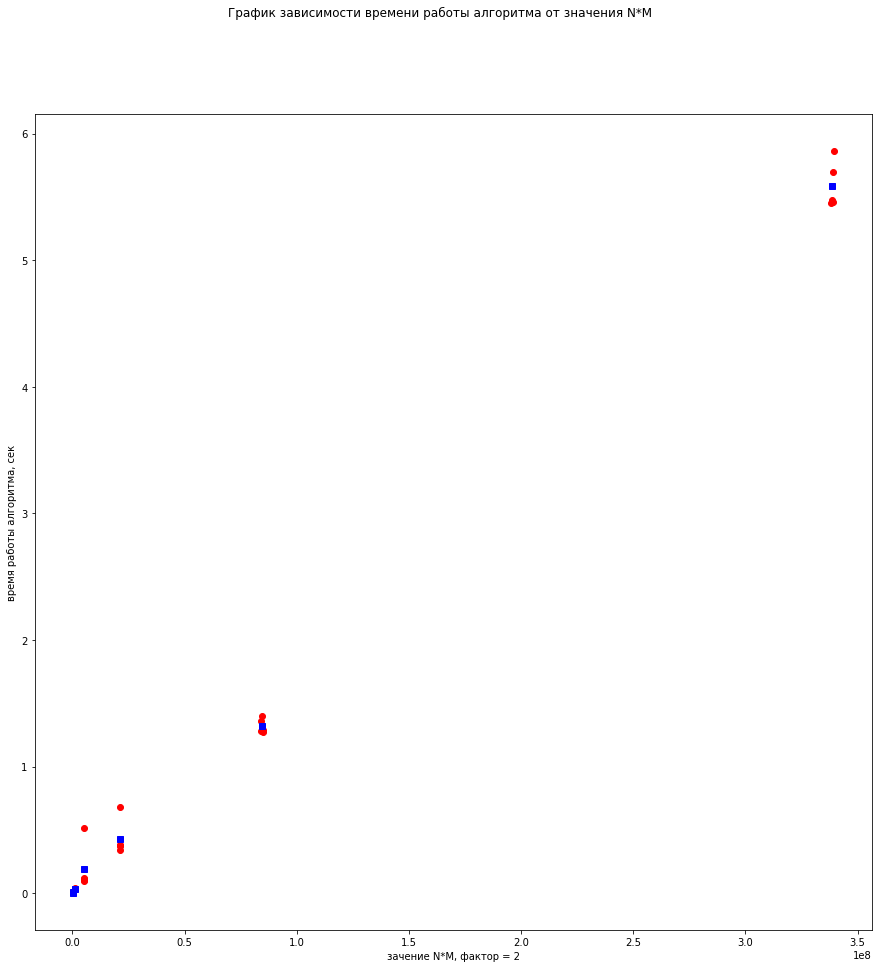

In [163]:
#построение графика

import matplotlib.pyplot as plt

n_array = [];
m_array = [];
time_array = [];
nm_array = [];
for (n, m, time) in repetitions_list:
  n_array.append(n);
  m_array.append(m);
  nm_array.append(n*m);
  time_array.append(time);

time_array_middle = [];
nm_array_middle = [];
for (n, m, time) in result_list:
  nm_array_middle.append(n*m);
  time_array_middle.append(time);

#print(n_array);
#print(nm_array);
#print(time_array);
plt.rcParams["figure.figsize"] = (15,15)
plt.plot(nm_array, time_array, 'ro', nm_array_middle, time_array_middle, 'bs');

plt.suptitle('График зависимости времени работы алгоритма от значения N*M')
plt.xlabel('зачение N*M, фактор = 2');
plt.ylabel('время работы алгоритма, сек')
plt.show()

0
1
2
3
4
5
6
[('n', 200, '', '', '', '', ''), ['m', 433, 403, 434, 417, 420, 421.4], ['time', 0.0038901080006326083, 0.00788764799835917, 0.004105482001250493, 0.003727884999534581, 0.004223384999932023, 0.0047669015999417755], ('n', 400, '', '', '', '', ''), ['m', 820, 820, 848, 828, 827, 828.6], ['time', 0.009659760000431561, 0.010340475999328191, 0.010801474998515914, 0.01147715099978086, 0.011689487999319681, 0.010793669999475241], ('n', 800, '', '', '', '', ''), ['m', 1652, 1686, 1643, 1660, 1640, 1656.2], ['time', 0.03015068899912876, 0.04017941599886399, 0.03208244000052218, 0.030774686998483958, 0.03174681699965731, 0.03298680979933124], ('n', 1600, '', '', '', '', ''), ['m', 3297, 3297, 3342, 3282, 3271, 3297.8], ['time', 0.5123411439999472, 0.10551497699998436, 0.11377968700071506, 0.11657854300028703, 0.09634114599975874, 0.18891109940013848], ('n', 3200, '', '', '', '', ''), ['m', 6589, 6648, 6639, 6630, 6590, 6619.2], ['time', 0.33817058299973723, 0.3770896650003124, 0.36

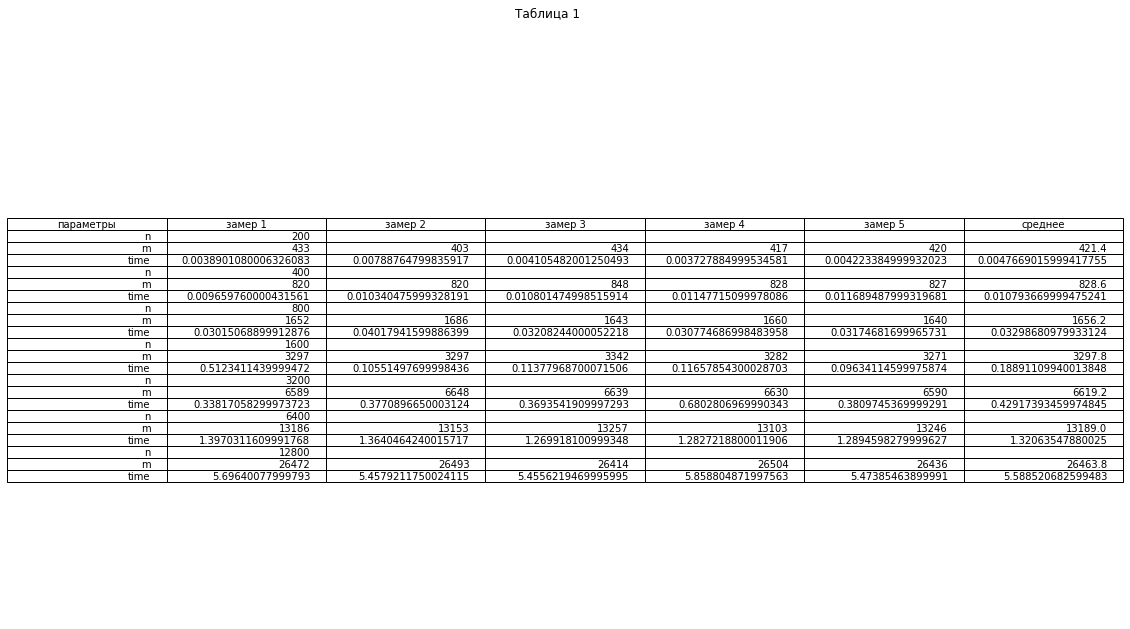

In [167]:
# формирование таблицы всех результатов

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1)
data=list();
column_labels=["параметры", "замер 1", "замер 2", "замер 3", "замер 4", "замер 5", "среднее"]

# замеры для текущего N
for i in range(0, count_different_nodes):

  print(i)
  data.append(("n",  result_list[i][0], "", "", "", "", ""));
  row1 = ("m", repetitions_list[i * count_repetition][1], repetitions_list[i * count_repetition + 1][1], repetitions_list[i * count_repetition + 2][1], repetitions_list[i * count_repetition + 3][1], repetitions_list[i * count_repetition + 4][1], result_list[i][1]);
  row2 = ("time",  repetitions_list[i * count_repetition][2], repetitions_list[i * count_repetition + 1][2],  repetitions_list[i * count_repetition + 2][2], repetitions_list[i * count_repetition + 3][2], repetitions_list[i * count_repetition + 4][2], result_list[i][2]);
  data.append(list(row1));
  data.append(list(row2));

print(data);
ax.axis('tight')
ax.axis('off')
ax.table(cellText=data,colLabels=column_labels,loc="center")

plt.rcParams["figure.figsize"] = (20, 13)
plt.suptitle('Таблица 1')
plt.show()